# <center>PIB e Expectativa de Vida pela OMS</center>

<img src="https://www.moneycrashers.com/wp-content/uploads/2019/04/gross-domestic-product-definition.jpg" alt="GDP" style="zoom:15%;" />

Este trabalho foi realizado por Vinicius Ferreira Amim, sendo o primeiro projeto voltado a Data Visualization de uma série de projetos em Ciência de Dados.

Iremos analisar os dados do PIB e expectativa de vida extraídas da Organização Mundial de Saúde e o Banco Mundial, o objetivo é tentar identificar a relação entre o PIB e a expectativa de vida entre 6 países.

Os dados foram obtidos pela [codeacademy](https://www.codecademy.com/) e através dos gráficos gerados faremos algumas conclusões.

### 1. Introdução

O produto interno bruto (PIB) é um indicador econômico, que, em linhas gerais, representa a soma (em valores monetários) de todos os bens e serviços finais produzidos numa determinada região. O PIB é um dos indicadores mais utilizados na macroeconomia para quantificar a atividade econômica de uma região.

Um dos critérios de IDH (Índice de Desenvolvimento Humano) é a qualidade de vida segundo o Produto Interno Bruto per capita, que se refere ao total de bens e serviços produzidos durante um ano pelo país dividido pelo número de habitantes, indicando assim o que cada pessoa produziu. Esse critério reflete o padrão de vida de cada habitante.

O conjunto de dados (dataset) nos fornece informações sobra 6 países, abaixo uma breve explicação sobre as colunas existentes e o que elas representam:

- **Country / País** – *Nação*
- **Year / Ano** – *O ano da observação*
- **Life expectancy at birth (years) / Expectativa de vida ao nascer (anos)** – *Valor da expectativa de vida em anos.*
- **GDP / PIB** – *Produto interno bruto em dólares americanos.*

### 2. Importação dos Pacotes Python

Vamos importar as bibliotecas da linguagem de programação Python

In [1]:
# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importando Dataset
df = pd.read_csv('all_data.csv')

### 3. Exploração e Preparação do Dataset

In [2]:
# Verificando o data set
print(df.head())
print(df.columns)

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10
Index(['Country', 'Year', 'Life expectancy at birth (years)', 'GDP'], dtype='object')


In [3]:
# Verificando valores NaN ou missing values
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

Ótimo, não temos nenhum valor Nulo.

In [4]:
# Vamos mudar o nome da coluna Life
df.rename(columns = {
    'Life expectancy at birth (years)' : 'LEB'
}, inplace = True)

df.head()

,Country,Year,LEB,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Mudamos a coluna *'Life expectancy at birth (years)'* para uma abreviação *'LEB'* apenas para facilitar com os comandos

In [5]:
# Agrupar os paises
agrupar_paises = df.groupby('Country')[['GDP', 'LEB']].mean().sort_values(['LEB'], ascending=False)
agrupar_paises

,GDP,LEB
Country,,
Germany,3.094776e+12,79.65625
Chile,1.697888e+11,78.94375
United States of America,1.407500e+13,78.06250
Mexico,9.766506e+11,75.71875
China,4.957714e+12,74.26250
Zimbabwe,9.062580e+09,50.09375


### 4. Visualizando os dados

#### 4.1 Distribution

Visualizamos distribuições para mostrar os valores possíveis que podemos esperar ver em uma variável, junto com a probabilidade deles.

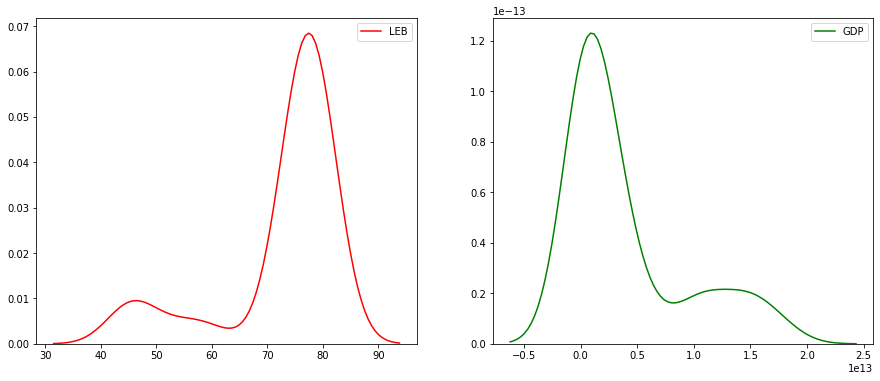

In [120]:
plt.figure(figsize=(15,6))

# Subplot 1
plt.subplot(1, 2, 1)
sns.kdeplot(df.LEB, color = 'red')

# Subplot 2
plt.subplot(1, 2, 2)
sns.kdeplot(df.GDP, color = 'green')

plt.show()

Nota-se que a distribuição:
* O `LEB` (Expectativa de vida ao nascer) é um skew left, uma vez que sua 'cauda' é para a esquerda.
* O `GDP` (Produto interno bruto) é um skew right, possuindo uma cauda para a direita.

A cauda de um gráfico é um conceito visual ao qual se refere a uma parte que diminui.

Outra forma comum de se visualizar 'skew' é utilizando o boxplot

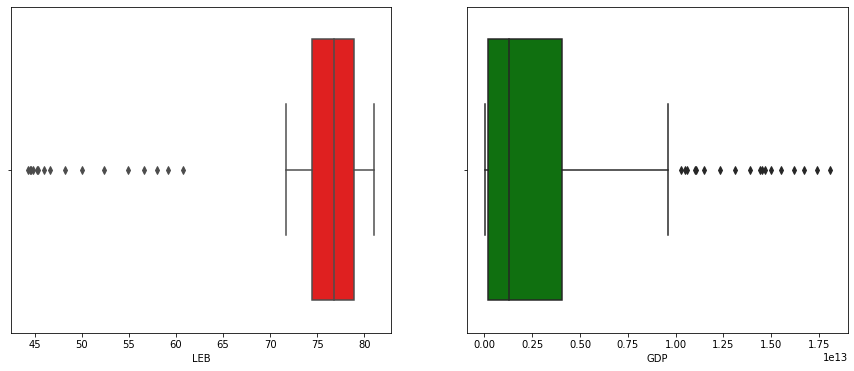

In [119]:
plt.figure(figsize=(15,6))

# Subplot 1
plt.subplot(1, 2, 1)
sns.boxplot(df.LEB, color = 'red')

# Subplot 2
plt.subplot(1, 2, 2)
sns.boxplot(df.GDP, color = 'green')

plt.show()

#### 4.2 Relationship

Utilizamos para ver a relação entre duas variáveis.

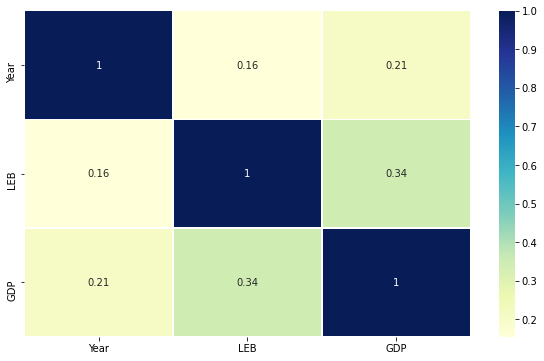

In [124]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), linewidths=.5, annot=True, cmap='YlGnBu')
plt.show()

Vamos utilizar os países e verificar a média que cada um possui pelas colunas: `LEB` e `GDP`

In [127]:
df_medias = df.groupby('Country').mean().reset_index()

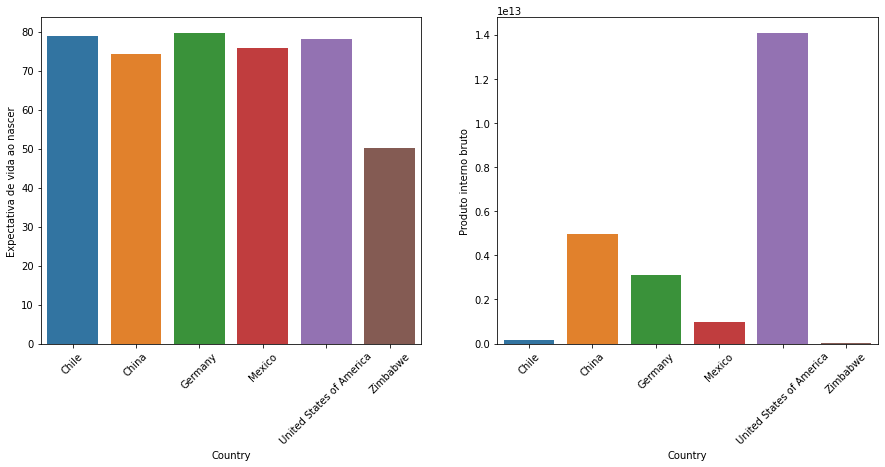

In [136]:
plt.figure(figsize=(15, 6))

# Subplot 1
plt.subplot(1, 2, 1)
sns.barplot(x='Country', y='LEB', data = df_medias)
plt.ylabel('Expectativa de vida ao nascer')
plt.xticks(rotation = 45)

# Subplot 2
plt.subplot(1, 2, 2)
sns.barplot(x='Country', y='GDP', data = df_medias)
plt.ylabel('Produto interno bruto')
plt.xticks(rotation = 45)

plt.show()

O Zimbabwe é o país com a menor expectativa de vida no nascimento, com valores próximos a 50 anos, seguido da china com apróximadamente 75 anos.

O país com maior PIB é os Estados Unidos seguido da China, Zimbabwe e Chile possuem o menor PIB respectivamente.

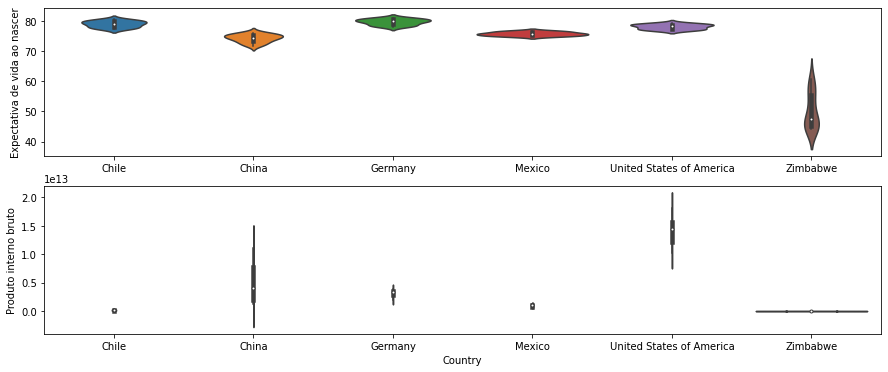

In [144]:
plt.figure(figsize=(15, 6))

# Subplot 1
plt.subplot(2, 1, 1)
sns.violinplot(x='Country', y='LEB', data = df)
plt.ylabel('Expectativa de vida ao nascer')
plt.xlabel('')


# Subplot 2
plt.subplot(2, 1, 2)
sns.violinplot(x='Country', y='GDP', data = df)
plt.ylabel('Produto interno bruto')


plt.show()

#### 4.3 Trends

Define um comportamento de acordo com um padrão de mudanças, como o tempo.

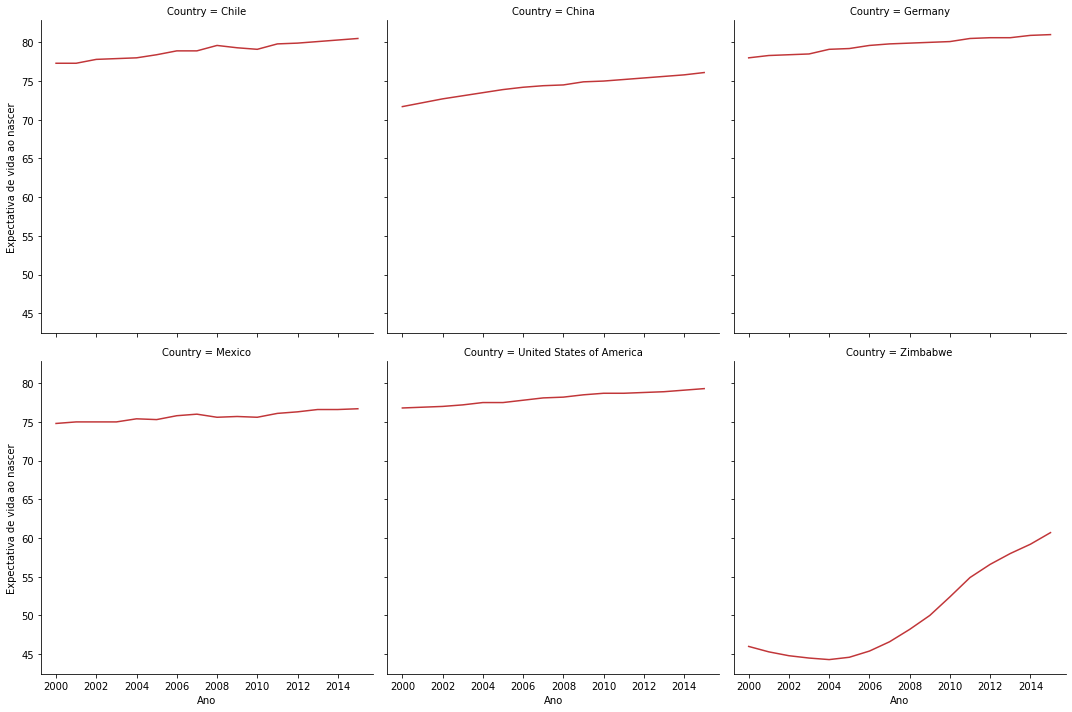

<Figure size 432x288 with 0 Axes>

In [89]:
sns.set_palette('RdBu')
ax = sns.relplot(x='Year', y='LEB', data=df, kind='line', col ='Country', col_wrap=3)
ax.set_axis_labels('Ano', 'Expectativa de vida ao nascer')
plt.show()
plt.clf()

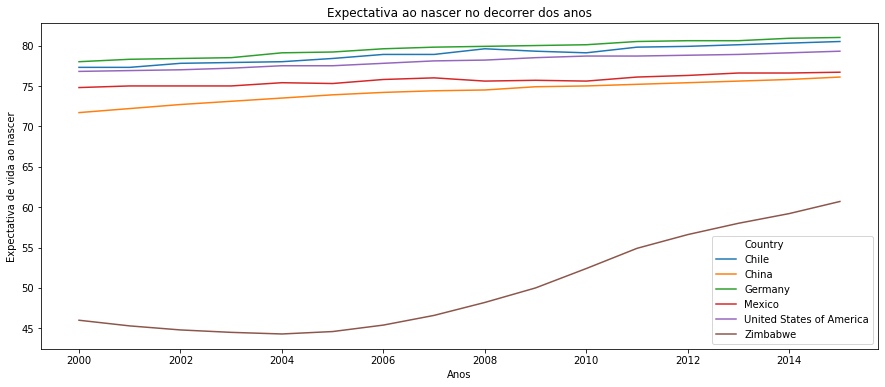

<Figure size 432x288 with 0 Axes>

In [121]:
fig, ax = plt.subplots(figsize=(15,6))
sns.set_palette('tab10')
sns.lineplot(x='Year', y='LEB', data=df, hue ='Country', ax=ax, markers=True)
plt.xlabel('Anos')
plt.ylabel('Expectativa de vida ao nascer')
plt.title('Expectativa ao nascer no decorrer dos anos')
plt.show()
plt.clf()

Percebemos que a Zimbabwe é o país com a pior expectativa de vida, tendo uma leve melhora em 2015,
A Alemanha é o país com a maior expectativa de vida.

Visto as expectativas de vida de cada país podemos verificar o quanto o PIB influencia neste processo.

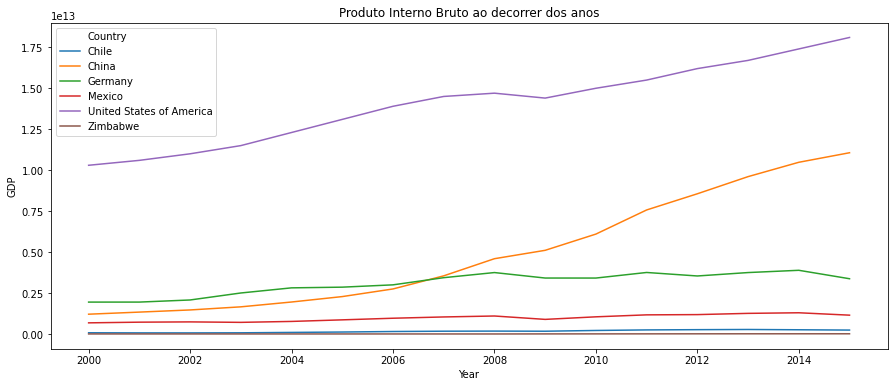

<Figure size 432x288 with 0 Axes>

In [145]:
# Vamos criar o gráfico do PIB ao decorrer dos anos
plt.figure(figsize=(15,6))
sns.set_palette('tab10')
sns.lineplot(data=df, x='Year', y='GDP', hue='Country')
plt.title('Produto Interno Bruto ao decorrer dos anos')
plt.show()
plt.clf()

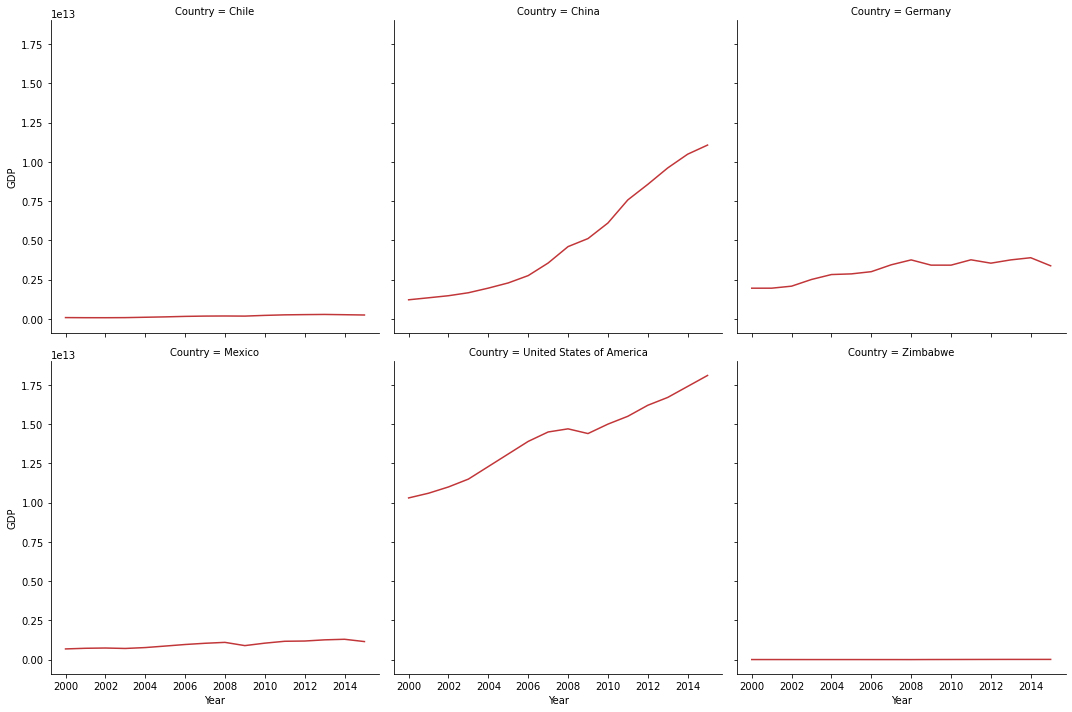

<Figure size 432x288 with 0 Axes>

In [73]:
# Vamos analisar os países individualmente
sns.set_palette('RdBu')
sns.relplot(x='Year', y='GDP', data=df, kind='line', col ='Country', col_wrap=3)
plt.show()
plt.clf()

Notamos que Zimbabwe possui o menor PIB e os Estados Unidos o maior, vamos analisar separadamente estes dois países.

## Continua